#Daffa Rizki Rizaly - 2301931251

#1. BeeVision is planning to build an affect-aware system that can perceive interlocutors' emotions during a social interaction through their facial expressions. Your task is to help the company build a model that can recognize emotions from facial expressions. You can use one of (or both) datasets prepared for you in https://bit.ly/COMP7116001Dataset.
a) [LO 2, 20 points] Build an emotion recognition model by using any machine learning techniques/algorithms of your choice. Explain comprehensively how the algorithms work and why you choose the algorithms. Moreover, explain thoroughly the features and descriptors that you implemented!

b) [LO 2, 5 points] Evaluate your model using evaluation metrics of your choice and explain the results!


I'll be making a facial expression using SVM. SVM or a Support Vector Machines is a algorithm used for both regression and classification problems.The goal of SVM is to find a hyperplane that connects the data points to their potential classes in an n-dimensional space. SVM for classifcaton will find a plane with the greatest margin, i.e. the greatest distance between data points from both classes. SVM uses 'kernel', a set of mathematical functions.

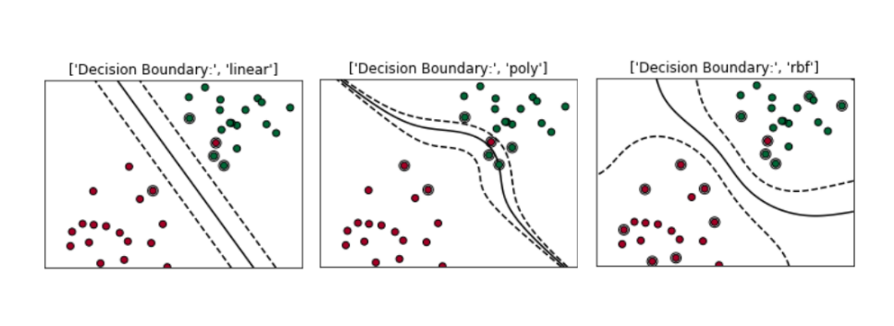

The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions.
Two kernel we'll be using is :
1. Polynomial kernel

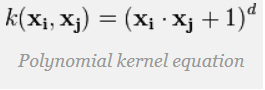
2. Gaussian radial basis function (RBF)

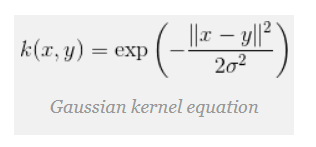


The reason for me using a svm model for this problem is :


*   SVM input is very flexible. SVM able to use data such as image, text, audio
*   Overfitting is not a problem with SVMs in general.

The features used is the rgb value of the image



#Import Libraries and dataset

In [ ]:
import numpy as np #
import os
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize 
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

* Pandas are used to convert datasets to dataframe  
* Numpy is used for data manipulation
* OS used to browse files 
* cv2 for image import 
* resize to resize the image 
* SVM and gridsearch cv as models for classification 
* Classification report and confusion matrix as metrics evaluation model

In [ ]:
#Declare directories
train_dir = "/content/drive/MyDrive/dataset/Emotions/1/train"
test_dir = "/content/drive/MyDrive/dataset/Emotions/1/test"

In [ ]:
Categories=['contempt','anger','disgust','surprise','fear','sadness','happy']

In [ ]:
emotion = os.listdir(train_dir) # list directories in emotions folder
train_data = []
train_target = []
for index, emotions in enumerate(emotion):
    i=0
    full_name_path = train_dir+'/'+ emotions
    for image_path in os.listdir(full_name_path):
        if(i<54):
            full_image_path = full_name_path+'/'+image_path
            img_gray = cv2.imread(full_image_path) #read the image
            img_gray=resize(img_gray,(48,48,3))#change image size
            train_data.append(img_gray.flatten()) # append the flatten pixel values
            train_target.append(index)
            i = i+1;
        else:
            break;

In this part we will input the image into a list. we will change the image into a grayscale and resize the image into 48,48,3. after that we will flatten and append into train_data. For the label we will append into train_target

In [ ]:
flat_data=np.array(train_data)
target=np.array(train_target)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data

In [ ]:
x_train = x_train / 255.0

now we will change the list into an array and change into dataframe and alocate into x_train and y_train

#Build the model

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']} 
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In this part, we will declare mutiple parameter C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly'] and use GridSearchCV will find the best parameter to use.

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

Then we will fit with the x and y

#Evaluation

In [ ]:
emotion = os.listdir(test_dir) # list directories in emotions folder
train_data = []
test_data = []
test_target = []
for index, emotions in enumerate(emotion):
    full_name_path = test_dir+'/'+ emotions
    for image_path in os.listdir(full_name_path):
        full_image_path = full_name_path+'/'+image_path
        img_gray = cv2.imread(full_image_path) #read the image and change into grasycale
        img_gray=resize(img_gray,(48,48,3))#change image size
        test_data.append(img_gray.flatten()) # append the flatten pixel values
        test_target.append(index)

In [ ]:
flat_data=np.array(test_data)
target=np.array(test_target)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

We will now do the same to the test dataset

In [ ]:
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        85
           5       0.00      0.00      0.00        49
           6       0.13      0.25      0.18       146

    accuracy                           0.10       384
   macro avg       0.02      0.04      0.03       384
weighted avg       0.05      0.10      0.07       384



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model performs badly , it might be because of the differences between pixel values among the emotion categories isnt too much so the svm did't pick up the correct hyperplane

#2. Recognize the person's emotions in the picture provided in https://bit.ly/COMP7116001Dataset2 by using the model you have trained and evaluated in no 1.
a) [LO 3, 10 points] Detect the face within the image using the Viola-Jones algorithm and crop the face. Explain comprehensively how the algorithms work!

b) [LO 1, 10 points] Prepare the images (cropped face) using any image processing techniques that you think is necessary to improve the quality of the images! Explain your choice. Moreover, describe the computational principles of the image processing techniques applied in your case.

The Viola Jones algorithm is named after two computer vision researchers, Paul Viola and Michael Jones, who proposed the method in their work "Rapid Object Detection Using a Boosted Cascade of Simple Features" in 2001. The Viola-Jones Object Detection Framework can recognize things in photos rapidly and correctly, and it works especially well with the human face. Given an image , the program analyses numerous smaller subregions and attempts to discover a face by looking for certain attributes in each subregion. Because an image may have several faces of differing sizes, it must be checked in a variety of scales and positions. Viola and Jones detected faces using Haar-like properties in this approach.

The Viola Jones algorithm consists of four major steps, which we will go over in the sections that follow:



1.   Selecting Haar-like features
    Digital image features called Haar-like features are employed in object recognition.Haar-like features contains darker and ligher part.  Viola and Jones observed three sorts of Haar-like features in their research:


*   Aspects of the edge
*   Line-features
* Features on all four sides

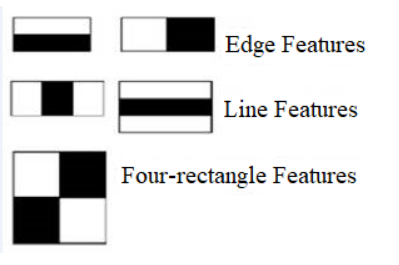

Edge and line characteristics can be used to detect edges and lines, respectively. Diagonal features are found using the four-sided characteristics.



2.   Creating a integral image
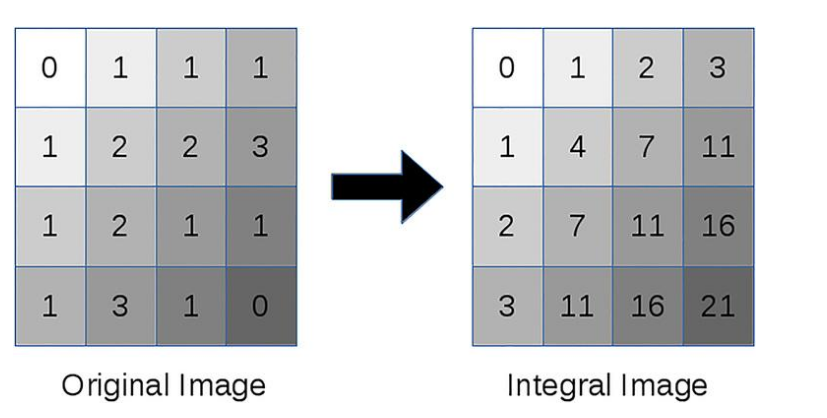

    Integral image used to calculate the sum of pixel values in an image or a rectangular area of an image in a quick and efficient manner. We save a lot of time computing the summation of all the pixels in a rectangle when we use integral images since we only have to do computations on four edges of the rectangle. For a better understanding, look at the sample below.
3. AdaBoost training is being conducted.

    The AdaBoost (Adaptive Boosting) Algorithm is a machine learning algorithm that selects the the best features and outputs a classifier Each Haar-like feature in the Viola-Jones method represents a weak learner. AdaBoost evaluates the performance of the classifiers you provide to determine the kind and size of a feature that will be included in the final classifier.
4. Cascades of classifiers
    Cascades of classifier is a multistaged classifier where each stage consist of a classifier created by the adaboost. the input will be evaluated by the classifier and will be send to the next clasifier if the classifier input a positive answer




In [ ]:
#import dataset
import os
import cv2
import numpy as np
import math

In [ ]:
path='/content/drive/MyDrive/dataset/EmotionsInWild'
person_name = os.listdir(path)
face_list = []
class_list= []

In [ ]:
#import cascade classifier
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
from google.colab.patches import cv2_imshow

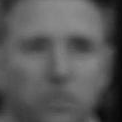

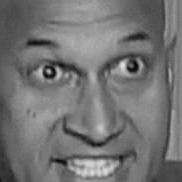

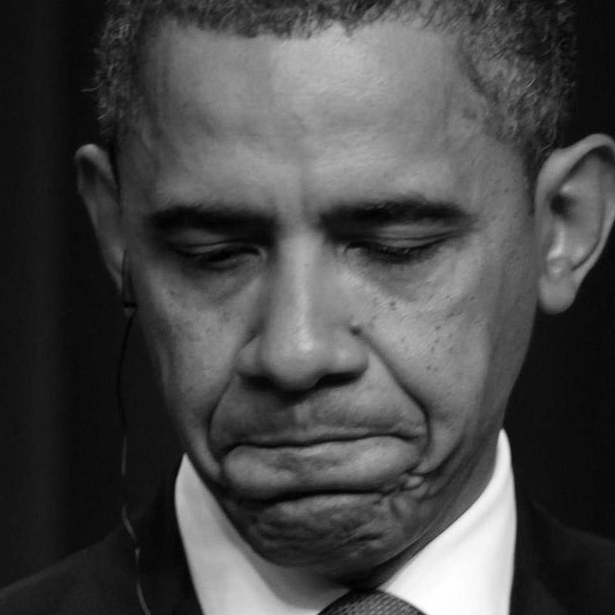

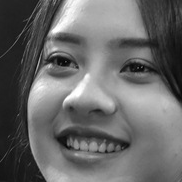

In [ ]:
for image_path in os.listdir(path):
    full_image_path = path+'/'+image_path
    image_gray = cv2.imread(full_image_path,0)
    
    #detect faces
    detected_face = face_cascade.detectMultiScale(image_gray,scaleFactor=1.5,minNeighbors = 7)

    if(len(detected_face)<1):
            continue
            
    for face_rect in detected_face:
        x,y,w,h = face_rect
        face_img = image_gray[y:y+w,x:x+h] 
        cv2.resize(face_img,(48,48))
        face_list.append(face_img)
    
        cv2_imshow(face_img)

#3. BeeVision's second project is to build a Dog and Cat recognizer using the dataset provided in https://www.kaggle.com/c/dogs-vs-cats/
a) [LO 2, 15 points] Build Visual Vocabulary from the dataset using the Visual Bag of Words algorithm! Explain comprehensively how the algorithms work!

b) [LO 3, 10 points] Use K-NN to predict the object (i.e., dog or cat) and explain the
results!

Bag of Visual Words is a technique that is commonly used to do image classification. Thing technique has the same idea base as bag of words in NLP but instead of using words, we use images. As demonstrated in the graphic below, a Bag of Visual Word is nothing more than displaying an image as a collection of randomly placed image patches.

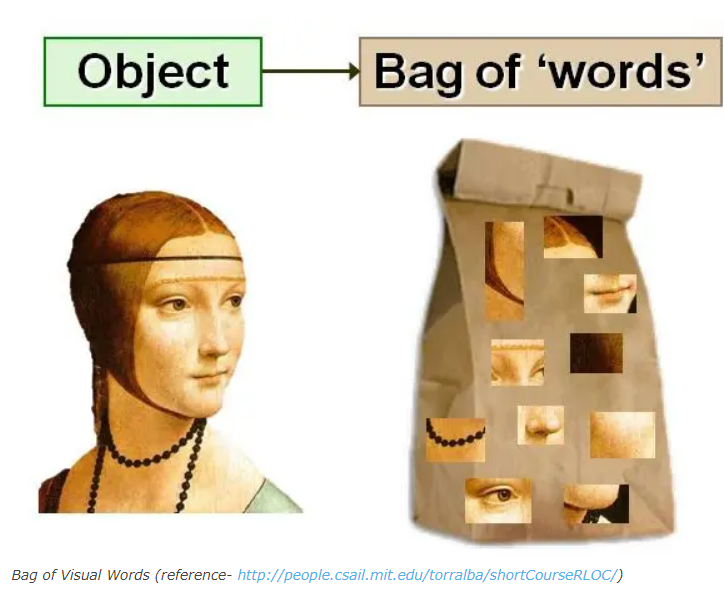

`1

Step by step BoVW
1. We use SIFT to extract local features from several images
2. Get visual words by finding the center points through quantizing the feature space via clustering algorithms like K-means
3. Extract local features and then compare those local features to the visual words. Make histograms for each image for both the test and training dataset out of the comparisons between local features and visual words.
4. Predict the class of test images by comparing it to every histogram train images. To predict it, we will use 1-NN.
5. Calculate the accuracy

In [ ]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6 MB 1.7 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
print(cv2.__version__)

3.4.2


In [ ]:
#Importing the dataset
train_path="/content/drive/MyDrive/dataset/catvsdogs1/train"
test_path="/content/drive/MyDrive/dataset/catvsdogs1/test1"

#Declaring class names
class_names=['Cat','Dog']

In [ ]:
#Get all path
training_names = os.listdir(train_path)
image_paths = []
for training_name in training_names:
    image_path = os.path.join(train_path, training_name)
    image_paths += [image_path]

In [ ]:
des_list = []


for i, image_path in enumerate(image_paths):
    im = cv2.imread(image_path)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    print ("Extract SIFT of %s image, %d of %d images" %(training_names[i], i, len(image_paths)))
    
    sift = cv2.xfeatures2d.SIFT_create()
    (kps, des) = sift.detectAndCompute(gray, None)
 
    des_list.append((image_path, des))

Extract SIFT of cat.9100.jpg image, 0 of 25010 images
Extract SIFT of cat.9078.jpg image, 1 of 25010 images
Extract SIFT of cat.9104.jpg image, 2 of 25010 images
Extract SIFT of cat.9077.jpg image, 3 of 25010 images
Extract SIFT of cat.9091.jpg image, 4 of 25010 images
Extract SIFT of cat.9116.jpg image, 5 of 25010 images
Extract SIFT of cat.9121.jpg image, 6 of 25010 images
Extract SIFT of cat.9085.jpg image, 7 of 25010 images
Extract SIFT of cat.9109.jpg image, 8 of 25010 images
Extract SIFT of cat.9102.jpg image, 9 of 25010 images
Extract SIFT of cat.9105.jpg image, 10 of 25010 images
Extract SIFT of cat.9092.jpg image, 11 of 25010 images
Extract SIFT of cat.9084.jpg image, 12 of 25010 images
Extract SIFT of cat.9108.jpg image, 13 of 25010 images
Extract SIFT of cat.911.jpg image, 14 of 25010 images
Extract SIFT of cat.9080.jpg image, 15 of 25010 images
Extract SIFT of cat.9072.jpg image, 16 of 25010 images
Extract SIFT of cat.9103.jpg image, 17 of 25010 images
Extract SIFT of cat.9

In this part , we'll getting all the keypoints and descriptor using sift. because the large dataset , i didnt get to finish running in this ipnyb

In [ ]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))  

In [ ]:
numWords = 1000
# Perform k-means clustering
print ("Start k-means: %d words, %d key points" %(numWords, descriptors.shape[0]))
voc, variance = kmeans(descriptors, numWords, 1) 


In [ ]:
# Calculate the histogram of features
im_features = np.zeros((len(image_paths), numWords), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

print ("Features =", im_features)

#4. In addition to building a Dogs Vs Cats recogniser, BeeVision is also planning to develop an instance retrieval system using the same dataset used in no 3 (https://www.kaggle.com/c/dogs-vs-cats/ ). You can also use the Visual Vocabulary created in no 3.
a) [LO 3, 15 points] Your task is to build an instance retrieval system and explain thoroughly how the algorithms work.

b) [LO 3, 5 points] How do you ensure the spatial verification between the
correspondence of the images?

c) [LO 3, 5 points] Finally, describe the results!


Image Instance retrieval is a system that retrieve a spesific thing from a dataset. Instead of find the class of the object, the sytem will search exact instance of the object. its basically a search engine.

 Firstly we'll be using bag of visual words which contains higly localized. the patch is divided into smaller sub-patches, and in each one of these patches, you extract information like the average gradient magnitude, or the average sum of like x and y gradient. After getting the vag of words, we will do the same into an image and get we will have a local and global descriptor. then we will try to match those.

In [ ]:
import argparse as ap
import cv2
import numpy as np
import os
import joblib
from scipy.cluster.vq import *

from sklearn import preprocessing

from pylab import *

In [ ]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
idf = np.array(np.log((1.0*len(image_paths)+1) / (1.0*nbr_occurences + 1)), 'float32')

# Perform L2 normalization
im_features = im_features*idf
im_features = preprocessing.normalize(im_features, norm='l2')      
    

we will use the be using the previous visual words to do tfidf vectorrization and l2 normalization

In [ ]:
image_path = "/content/drive/MyDrive/dataset/catvsdogs1/test1/1"
print (image_path)

des_list =[]
im = cv2.imread(image_path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
(kps, des) = sift.detectAndCompute(gray, None)

des_list.append((image_path, des))   
    


In this part we will pick 1 image and get the keypoints and descriptor

In [ ]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]

# 
test_features = np.zeros((1, numWords), "float32")
words, distance = vq(descriptors,voc)
for w in words:
    test_features[0][w] += 1



In [ ]:
# Perform Tf-Idf vectorization and L2 normalization
test_features = test_features*idf
test_features = preprocessing.normalize(test_features, norm='l2')

score = np.dot(test_features, im_features.T)
rank_ID = np.argsort(-score)

print ("Ranking = ", rank_ID)
print (score[0][49])


In [ ]:
# Visualize the results
figure()

subplot(3,5,1)
imshow(im[:,:,::-1])
axis('off')
for i, ID in enumerate(rank_ID[0][0:4]):
     im = cv2.imread(image_paths[ID])
     print ("index =", i, "ID =",ID)
     img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
     subplot(3,5,i+6)
     imshow(img)
     axis('off')
show()  